# Assignment 2: Supervised Learning and SVM Algorithm


### Group Members:
- Muntasir Islam
- Md Maruf
- Firoz Chowdhury
- Sakshi Sakshi


# Part 1: Familiarization and Basic Testing of the SVM Algorithm

## 1.1 Dataset Selection
For this assignment, we selected our previous dataset **Work Hours and Productivity Dataset**.
It contains information about employees work hours and their corresponding productivity levels.


## 1.2 Load and Explore Dataset

In this section, we load the dataset **WorkhoursProductivity.xlsx** and explore its structure to understand the data before applying any machine learning algorithms.

- The dataset is loaded using the pandas library.

- We use `head()` to display the first few rows to get an overview of the columns and data types.

- The `info()` function provides information about column names, data types, and missing values.

- The `describe` function gives statistical summaries for the numeric columns.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn import datasets
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_excel('WorkhoursProductivity.xlsx')


In [3]:
# Dataset Information and Summary
# Basic info
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Department               10000 non-null  object 
 3   Job_Level                10000 non-null  object 
 4   Years_at_Company         10000 non-null  int64  
 5   Monthly_Hours_Worked     10000 non-null  int64  
 6   Remote_Work              10000 non-null  object 
 7   Meetings_per_Week        10000 non-null  int64  
 8   Tasks_Completed_Per_Day  10000 non-null  int64  
 9   Overtime_Hours_Per_Week  10000 non-null  int64  
 10  Work_Life_Balance        10000 non-null  object 
 11  Job_Satisfaction         10000 non-null  int64  
 12  Productivity_Score       10000 non-null  float64
 13  Annual_Salary            10000 non-null  int64  
 14  Absences_Per_Year      

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,40.655800,14.935600,169.513100,6.975200,10.98120,6.948000,4.991600,75.389223,117257.446300,9.49360
std,2886.89568,11.005101,8.359931,28.775487,4.295606,4.89633,4.330332,2.586232,14.450485,47410.812846,5.76471
min,1.00000,22.000000,1.000000,120.000000,0.000000,3.00000,0.000000,1.000000,50.000000,35001.000000,0.00000
25%,2500.75000,31.000000,8.000000,145.000000,3.000000,7.00000,3.000000,3.000000,62.855000,75761.750000,4.00000
50%,5000.50000,41.000000,15.000000,170.000000,7.000000,11.00000,7.000000,5.000000,75.535000,117645.000000,9.00000
75%,7500.25000,50.000000,22.000000,194.000000,11.000000,15.00000,11.000000,7.000000,88.032500,157836.750000,14.00000
max,10000.00000,59.000000,29.000000,219.000000,14.000000,19.00000,14.000000,9.000000,100.000000,199997.000000,19.00000


## 1.3 Algorithm Application
In this section, we applied the Support Vector Machine (SVM) classification algorithm to the same dataset used in Assignment 1. Using the same data allows us to directly compare the performance of SVM with the previously implemented kNN classifier.

### 1.3.1 Creating the Target Variable: High vs. Low Productivity
This section calculates the median of the Productivity_Score column and uses it as a threshold.
Employees with a score above the median are labeled as High Productivity (1), and those at or below are labeled as Low Productivity (0).
A new column named High_Productivity is added to the dataset.

In [4]:
# Create simple target: High Productivity (1) or Low Productivity (0)
median_score = df['Productivity_Score'].median()
df['High_Productivity'] = (df['Productivity_Score'] > median_score).astype(int)

### 1.3.2 Selecting Numerical Features for the Model
Here, we choose only simple numeric features to train the model.
The selected features include columns like age, years at the company, monthly hours worked, job satisfaction, and annual salary.
These features form the input matrix X.
The target variable y is the High_Productivity column created earlier.

In [5]:
# Choose simple features 
features = ['Age', 'Years_at_Company', 'Monthly_Hours_Worked', 
           'Job_Satisfaction', 'Annual_Salary']
# Our input data
X = df[features]  
# What we want to predict
y = df['High_Productivity']  

### 1.3.3 Splitting the Dataset Into Training and Testing Sets
The data is divided into two parts:

- 70% for training the model,

- 30% for testing the model.

This helps evaluate how well the model performs on unseen data.
A fixed random_state (42) is used to ensure the split is reproducible.

In [6]:
# Split data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 1.3.4 Testing Different SVM Kernels
This section evaluates how different SVM kernels perform on the classification task. By testing multiple kernels, we can identify which one provides the highest accuracy for our dataset.

### 1.3.5 Defining the Kernels to Test
We prepare a list of four common SVM kernels:

- linear

- poly (polynomial)

- rbf (Radial Basis Function)

- sigmoid

These kernels determine how the SVM separates the data in feature space.A dictionary named **results** is created to store the accuracy score for each kernel.
This allows easy comparison after all models are tested.

In [7]:
# Try 4 different types of SVM
kernels_to_try = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}


### 1.3.6 Looping Through Each Kernel
For each kernel in the list:

- An SVM model is created using that kernel.

- The model is trained using the training data.

- Predictions are made on the test data.

- The accuracy score is calculated.

- The accuracy is saved into the results dictionary.

- The performance of each kernel is printed for immediate comparison.

This loop ensures that each kernel is trained and evaluated in the same way.

In [8]:
print("Testing Different SVM Types:")

for kernel in kernels_to_try:
    # Create SVM with specific kernel
    svm = SVC(kernel=kernel, random_state=42)
    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Make predictions
    predictions = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    results[kernel] = accuracy
    
    print(f"{kernel} kernel: {accuracy:.3f}")



Testing Different SVM Types:
linear kernel: 0.506
poly kernel: 0.483
rbf kernel: 0.472
sigmoid kernel: 0.512


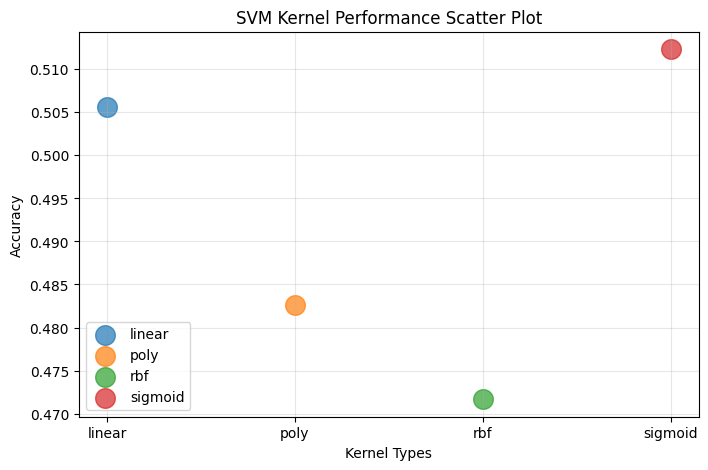

In [9]:
# Scatter plot
plt.figure(figsize=(8, 5))
for i, (kernel, accuracy) in enumerate(results.items()):
    plt.scatter(kernel, accuracy, s=200, alpha=0.7, label=kernel)
plt.xlabel('Kernel Types')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance Scatter Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.3.7 Finding the Best Kernel
After testing all kernels, the dictionary is searched to find which kernel achieved the highest accuracy.

This step identifies which SVM configuration works best for the dataset.

In [10]:
# Find the best one
best_kernel = max(results, key=results.get)
print(f"\nBest kernel: {best_kernel} with accuracy: {results[best_kernel]:.3f}")


Best kernel: sigmoid with accuracy: 0.512


### 1.3.8 Classification Report & Confusion Matrix
In this part of our assignment, our goal is to evaluate how well the best-performing SVM kernel classifies employee productivity levels. After identifying which kernel achieved the highest accuracy in our earlier comparison, we retrained the SVM model using that optimal kernel. We then measured its performance using several standard classification metrics.

In [11]:
# Classification Report and Confusion Matrix for Best Kernel
print(f"\nDetailed Results for {best_kernel} kernel:")
 
# Create the best model
best_svm = SVC(kernel=best_kernel, random_state=42)
best_svm.fit(X_train, y_train)
best_predictions = best_svm.predict(X_test)
 
# Calculate accuracy
final_accuracy = accuracy_score(y_test, best_predictions)
print(f"Accuracy: {final_accuracy:.3f}")


Detailed Results for sigmoid kernel:
Accuracy: 0.512


To understand how accurately the model distinguishes between Low Productivity and High Productivity employees, we generated a classification report, which provides precision, recall, and F1-scores for both classes. These metrics help us assess the strengths and weaknesses of the model—such as whether it is better at detecting high performers or low performers.

In [12]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=['Low Productivity', 'High Productivity']))


Classification Report:
                   precision    recall  f1-score   support

 Low Productivity       0.51      0.53      0.52      1483
High Productivity       0.52      0.50      0.51      1517

         accuracy                           0.51      3000
        macro avg       0.51      0.51      0.51      3000
     weighted avg       0.51      0.51      0.51      3000



We also created a confusion matrix to visualize the number of correct and incorrect predictions. This matrix allows us to clearly see where the model is making mistakes and how well it separates the two productivity categories. To make this easier to interpret, we presented the confusion matrix as a heatmap, giving a visual overview of the model’s predictive performance.

Confusion Matrix:
[[782 701]
 [762 755]]


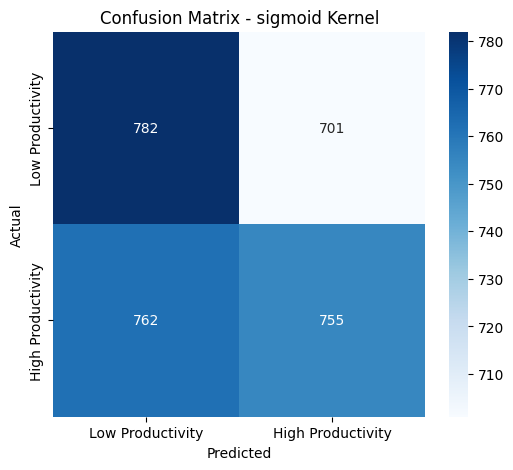

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("Confusion Matrix:")
print(cm)
 
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Productivity', 'High Productivity'],
            yticklabels=['Low Productivity', 'High Productivity'])
plt.title(f'Confusion Matrix - {best_kernel} Kernel')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
 

Overall, this section helps us determine not only the accuracy of our SVM model but also how reliably it classifies each productivity group, providing deeper insight into the effectiveness of the selected kernel.

In [14]:
# Explain what the numbers mean
print("\nWhat the confusion matrix tells us:")
print(f"Top-left {cm[0,0]}: Correctly predicted LOW productivity")
print(f"Top-right {cm[0,1]}: Wrong - said HIGH productivity but was actually LOW")
print(f"Bottom-left {cm[1,0]}: Wrong - said LOW productivity but was actually HIGH")
print(f"Bottom-right {cm[1,1]}: Correctly predicted HIGH productivity")


What the confusion matrix tells us:
Top-left 782: Correctly predicted LOW productivity
Top-right 701: Wrong - said HIGH productivity but was actually LOW
Bottom-left 762: Wrong - said LOW productivity but was actually HIGH
Bottom-right 755: Correctly predicted HIGH productivity


## 1.4 Use Case Identification 
Two Real World Application of SVM are:

**1. Text Classification & Spam Detection**

SVM works well with text because it handles high-dimensional data—each word becomes a feature.
It is commonly used in:

- Spam filtering

- Sentiment analysis

- News/article categorization

SVM performs well because email or text data is usually sparse, and SVM can separate classes effectively even with thousands of features.
**Real-world examples:** Gmail spam filtering, social-media sentiment analysis, search-engine document classification.

**2. Bioinformatics & Gene Expression Analysis**

Gene expression datasets contain thousands of gene features but only a small number of samples, making them ideal for SVM.

Typical applications include:

- Cancer detection and classification

- Disease prediction

- Protein structure analysis

SVM is effective in these “small sample, many features” scenarios.
**Real-world examples:** Tumor classification from microarray data, identifying disease-related genetic markers.
 

# Part 2: In-Depth Experimentation with the SVM Algorithm

## 2.1 Parameter Experimentation with SVM
In this section we work with parameter experimentation with SVM.

### 2.1.1 Testing Different C Values

The first part experiments with multiple C values, which control how strictly the SVM separates classes.

A list of C values (0.1, 1, 10, 100, 1000) is created.

For each C value:

- An SVM model with an RBF kernel is created.

- The model is trained on the training data.

- Predictions are made on the test set.

Accuracy is calculated and stored.

After testing all values, the C value with the highest accuracy is selected.

In [15]:
# Parameter Experimentation with SVM
print("\nParameter Experimentation with C values:")
 
# Test different C values
C_values = [0.1, 1, 10, 100, 1000]
C_results = {}
 
for C_val in C_values:
    svm = SVC(kernel='rbf', C=C_val, random_state=42)
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    C_results[C_val] = accuracy
    print(f"C = {C_val}: {accuracy:.3f}")
 
best_C = max(C_results, key=C_results.get)
print(f"Best C value: {best_C}")


Parameter Experimentation with C values:
C = 0.1: 0.472
C = 1: 0.472
C = 10: 0.471
C = 100: 0.471
C = 1000: 0.473
Best C value: 1000


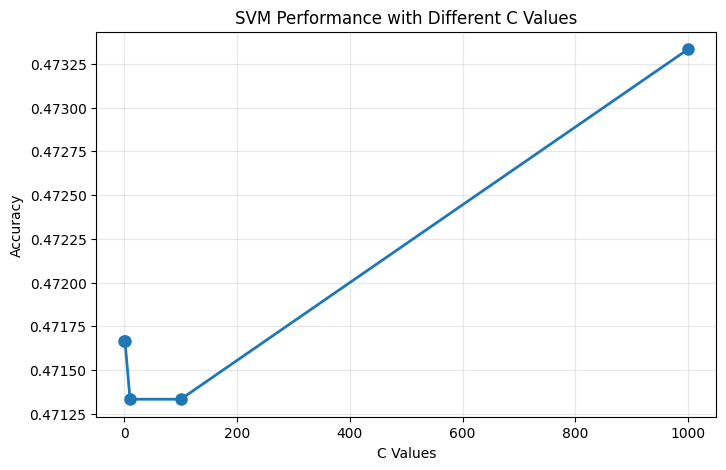

In [16]:
# Plot C parameter result in graph
plt.figure(figsize=(8, 5))
plt.plot(C_values, list(C_results.values()), marker='o', linewidth=2, markersize=8)
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('SVM Performance with Different C Values')
plt.grid(True, alpha=0.3)
plt.show()

### 2.1.2 Testing Different Gamma Values

Next, We tests different gamma values while keeping the best C value found earlier.

Gamma controls how far the influence of a single training point reaches.

A list of gamma values is tested (0.001, 0.01, 0.1, 1, 10).

For each gamma value:

- An SVM model is created using the best C.

- The model is trained and evaluated.

Accuracy is stored for comparison.

The gamma value with the highest accuracy is chosen.

In [17]:
# Test different gamma values
print("\nParameter Experimentation with gamma values:")
 
 
gamma_values = [0.001, 0.01, 0.1, 1, 10]
gamma_results = {}
 
for gamma_val in gamma_values:
    svm = SVC(kernel='rbf', C=best_C, gamma=gamma_val, random_state=42)
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    gamma_results[gamma_val] = accuracy
    print(f"Gamma = {gamma_val}: {accuracy:.3f}")
 
best_gamma = max(gamma_results, key=gamma_results.get)
print(f"Best gamma value: {best_gamma}")


Parameter Experimentation with gamma values:
Gamma = 0.001: 0.504
Gamma = 0.01: 0.487
Gamma = 0.1: 0.494
Gamma = 1: 0.494
Gamma = 10: 0.494
Best gamma value: 0.001


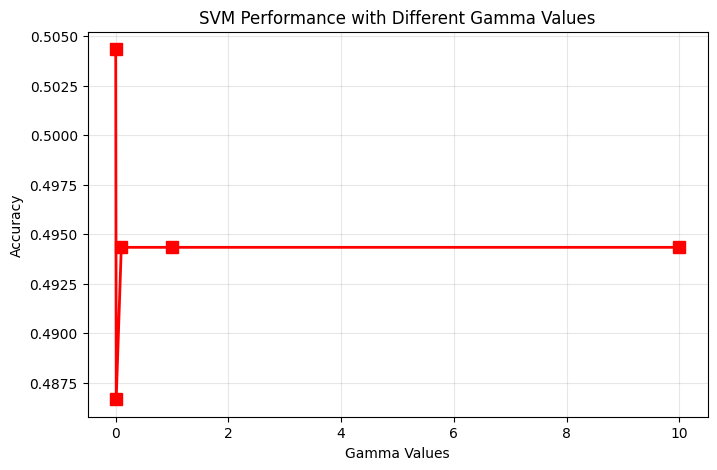

In [18]:
# Plot gamma parameter results
plt.figure(figsize=(8, 5))
plt.plot(gamma_values, list(gamma_results.values()), marker='s', color='red', linewidth=2, markersize=8)
plt.xlabel('Gamma Values')
plt.ylabel('Accuracy')
plt.title('SVM Performance with Different Gamma Values')
plt.grid(True, alpha=0.3)
plt.show()
 

### 2.1.3 Training the Final Optimized Model
After the best C and gamma values identified,A final SVM model is created using the optimized parameters.The model is trained on the full training data.
Predictions are made on the test set.The final accuracy score is printed.
This gives the best-performing SVM configuration for the dataset based on the tested parameter ranges.

In [19]:
# Final model with best parameters
print(f"\nFinal model with best parameters: C={best_C}, gamma={best_gamma}")
final_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
final_svm.fit(X_train, y_train)
final_predictions = final_svm.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final accuracy: {final_accuracy:.3f}")


Final model with best parameters: C=1000, gamma=0.001
Final accuracy: 0.504


## 2.2 Kernel Comparison
In this part of our assignment, we compare the performance of two different SVM kernels: linear and polynomial. The purpose of this comparison is to see how each kernel handles the structure of our dataset and which one is more effective for predicting employee productivity levels.

Both kernels were trained using the same training data and evaluated on the same test set to ensure a fair comparison. After training each model, we calculated their accuracy scores to measure how well they classified employees into **High Productivity** and **Low Productivity** groups.

In [20]:
# Kernel Comparison
print("\nKernel Comparison:")
 
# Compare linear and polynomial kernels
kernels_compare = ['linear', 'poly']
kernel_results = {}
 
for kernel in kernels_compare:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    kernel_results[kernel] = accuracy
    print(f"{kernel} kernel: {accuracy:.3f}")
 




Kernel Comparison:
linear kernel: 0.506
poly kernel: 0.483


Once both accuracy values were obtained, we compared the results to determine which kernel performed better. This comparison helps us understand whether a simple linear decision boundary is sufficient for our dataset or if a more complex, nonlinear polynomial boundary provides improved results.

In [21]:
# Show which kernel performed better
if kernel_results['linear'] > kernel_results['poly']:
    print(f"\nLinear kernel performed better by {kernel_results['linear'] - kernel_results['poly']:.3f}")
else:
    print(f"\nPolynomial kernel performed better by {kernel_results['poly'] - kernel_results['linear']:.3f}")


Linear kernel performed better by 0.023


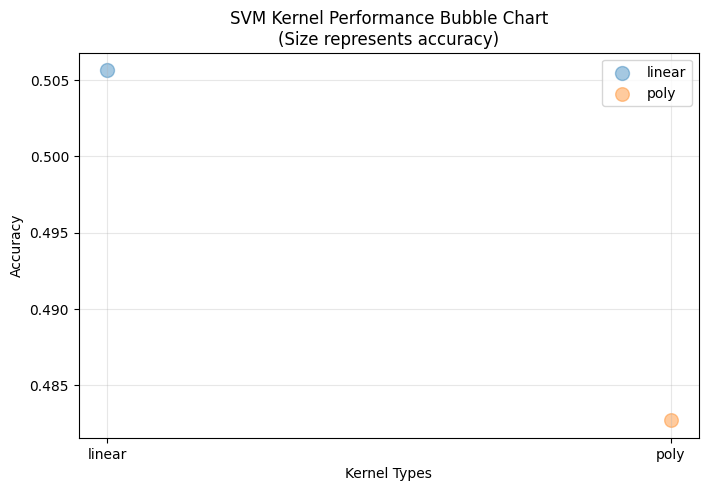

In [23]:
# Bubble chart
plt.figure(figsize=(8, 5))
for i, (kernel, accuracy) in enumerate(kernel_results.items()):
    plt.scatter(kernel, accuracy, s=accuracy*200, alpha=0.4, label=kernel)
plt.xlabel('Kernel Types')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance Bubble Chart\n(Size represents accuracy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Observation: 
Overall, this kernel comparison allows us to identify the more suitable SVM configuration for our classification task and supports the evaluation of different algorithmic choices in our supervised learning project.